In [83]:
import numpy as np
import pandas as pd
import scipy.stats
import altair as alt
import bootcamp_utils

This notebook is to practice manipulating my pd.DataFrame and make new rows from existing columns

In [84]:
pwd

'/Users/michaelpiacentino/Drive/SMPD3_quants'

In [85]:
# Read in my .csv as a pd.DataFrame
df = pd.read_csv('section_means_ratio.csv')
df

,Unnamed: 0,Embryo,Cntl Pax7 Total Cells,Expt Pax7 Total Cells,Cntl Sox9 Cells,Expt Sox9 Cells,Expt/Cntl Pax7,Expt/Cntl Sox9
0,0,1,36.8,23.6,24.8,13.4,0.641304,0.540323
1,1,2,46.4,48.0,23.8,21.2,1.034483,0.890756
2,2,3,34.2,32.4,24.8,27.6,0.947368,1.112903
3,3,5,73.6,52.0,41.2,28.4,0.706522,0.689320
4,4,6,34.8,46.8,26.0,37.8,1.344828,1.453846
5,5,7,41.2,37.6,21.8,22.6,0.912621,1.036697
6,6,9,23.4,32.4,14.2,14.2,1.384615,1.000000


In [86]:
# Column 1 is unnecessary, remove it
df = df.drop('Unnamed: 0', axis=1)
df

,Embryo,Cntl Pax7 Total Cells,Expt Pax7 Total Cells,Cntl Sox9 Cells,Expt Sox9 Cells,Expt/Cntl Pax7,Expt/Cntl Sox9
0,1,36.8,23.6,24.8,13.4,0.641304,0.540323
1,2,46.4,48.0,23.8,21.2,1.034483,0.890756
2,3,34.2,32.4,24.8,27.6,0.947368,1.112903
3,5,73.6,52.0,41.2,28.4,0.706522,0.689320
4,6,34.8,46.8,26.0,37.8,1.344828,1.453846
5,7,41.2,37.6,21.8,22.6,0.912621,1.036697
6,9,23.4,32.4,14.2,14.2,1.384615,1.000000


In [87]:
# Now I want a list with the column labels since I want to rename two of them
titles = list(df)
titles
# or this: list(df.columns.values)

['Embryo',
 'Cntl Pax7 Total Cells',
 'Expt Pax7 Total Cells',
 'Cntl Sox9 Cells',
 'Expt Sox9 Cells',
 'Expt/Cntl Pax7',
 'Expt/Cntl Sox9']

In [88]:
# Rename the column names I need to rename
titles[5] = 'Pax7'
titles[6] = 'Sox9'
titles

['Embryo',
 'Cntl Pax7 Total Cells',
 'Expt Pax7 Total Cells',
 'Cntl Sox9 Cells',
 'Expt Sox9 Cells',
 'Pax7',
 'Sox9']

In [89]:
# Rename column titles based on the list I fixed
df.columns = titles
df

,Embryo,Cntl Pax7 Total Cells,Expt Pax7 Total Cells,Cntl Sox9 Cells,Expt Sox9 Cells,Pax7,Sox9
0,1,36.8,23.6,24.8,13.4,0.641304,0.540323
1,2,46.4,48.0,23.8,21.2,1.034483,0.890756
2,3,34.2,32.4,24.8,27.6,0.947368,1.112903
3,5,73.6,52.0,41.2,28.4,0.706522,0.689320
4,6,34.8,46.8,26.0,37.8,1.344828,1.453846
5,7,41.2,37.6,21.8,22.6,0.912621,1.036697
6,9,23.4,32.4,14.2,14.2,1.384615,1.000000


In [90]:
# Make a new placeholder column named 'Ratio'
df['Ratio'] = 'NaN'
df

,Embryo,Cntl Pax7 Total Cells,Expt Pax7 Total Cells,Cntl Sox9 Cells,Expt Sox9 Cells,Pax7,Sox9,Ratio
0,1,36.8,23.6,24.8,13.4,0.641304,0.540323,NaN
1,2,46.4,48.0,23.8,21.2,1.034483,0.890756,NaN
2,3,34.2,32.4,24.8,27.6,0.947368,1.112903,NaN
3,5,73.6,52.0,41.2,28.4,0.706522,0.689320,NaN
4,6,34.8,46.8,26.0,37.8,1.344828,1.453846,NaN
5,7,41.2,37.6,21.8,22.6,0.912621,1.036697,NaN
6,9,23.4,32.4,14.2,14.2,1.384615,1.000000,NaN


In [91]:
# Copy Pax7 and Sox9 columns into their own pd.DataFrame
pax7_values = df[['Embryo','Pax7']].copy()
sox9_values = df[['Embryo','Sox9']].copy()

In [92]:
# Rename column manually so that they have the same title
pax7_values.columns = ['Embryo', 'Ratio']
pax7_values['stain'] = 'Pax7'

sox9_values.columns = ['Embryo', 'Ratio']
sox9_values['stain'] = 'Sox9'

In [93]:
# Concatenate these two pd.DataFrames into a single frame
ratios = pd.concat([pax7_values, sox9_values])
ratios

,Embryo,Ratio,stain
0,1,0.641304,Pax7
1,2,1.034483,Pax7
2,3,0.947368,Pax7
3,5,0.706522,Pax7
4,6,1.344828,Pax7
5,7,0.912621,Pax7
6,9,1.384615,Pax7
0,1,0.540323,Sox9
1,2,0.890756,Sox9
2,3,1.112903,Sox9


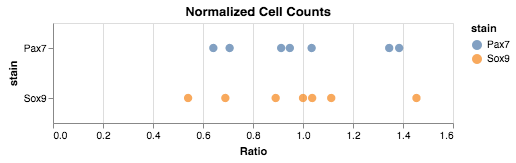

In [94]:
# Plotting time!
alt.Chart(ratios,
    title='Normalized Cell Counts',
    height=100
    ).mark_circle(
        size=70
    ).encode(
        x='Ratio:Q',
        y=alt.Y('stain:N', title='stain'),
        color='stain:N'
    )

In [95]:
# OR I could have 
df = pd.read_csv('section_means_ratio.csv').reset_index()

# melt DataFrame to rearrange columns
melted = pd.melt(df, id_vars='Embryo', 
        value_vars=['Expt/Cntl Pax7', 'Expt/Cntl Sox9'], 
        var_name='stain', value_name='ratio')

# Rename values in place
melted.replace(to_replace=['Expt/Cntl Pax7', 'Expt/Cntl Sox9'], value=['Pax7', 'Sox9'], inplace=True)

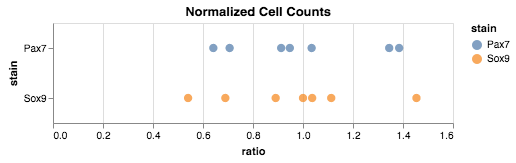

In [96]:
alt.Chart(melted,
    title='Normalized Cell Counts',
    height=100
    ).mark_circle(
        size=70
    ).encode(
        x='ratio:Q',
        y=alt.Y('stain:N', title='stain'),
        color='stain:N'
    )


In [97]:
df = pd.read_csv('section_means_ratio.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Embryo,Cntl Pax7 Total Cells,Expt Pax7 Total Cells,Cntl Sox9 Cells,Expt Sox9 Cells,Expt/Cntl Pax7,Expt/Cntl Sox9
0,1,36.8,23.6,24.8,13.4,0.641304,0.540323
1,2,46.4,48.0,23.8,21.2,1.034483,0.890756
2,3,34.2,32.4,24.8,27.6,0.947368,1.112903
3,5,73.6,52.0,41.2,28.4,0.706522,0.689320
4,6,34.8,46.8,26.0,37.8,1.344828,1.453846


In [98]:
melted2 = pd.melt(df, id_vars='Embryo', 
        value_vars=['Cntl Pax7 Total Cells', 'Expt Pax7 Total Cells', 'Cntl Sox9 Cells', 'Expt Sox9 Cells'], 
        var_name='stain', value_name='cells')
melted2.replace(to_replace=['Cntl Pax7 Total Cells', 'Expt Pax7 Total Cells', 'Cntl Sox9 Cells', 'Expt Sox9 Cells'], 
                value=['cntl pax7', 'expt pax7', 'cntl sox9', 'expt sox9'], inplace=True)

# might this help?
#df = df.rename(columns={'[bcd] (a.u.)': 'bcd'})

melted2.head()

,Embryo,stain,cells
0,1,cntl pax7,36.8
1,2,cntl pax7,46.4
2,3,cntl pax7,34.2
3,5,cntl pax7,73.6
4,6,cntl pax7,34.8


In [109]:
# Compute ECDF
melted2['ECDF'] = melted2.groupby('stain')['cells'].transform(bootcamp_utils.ecdf_y)

melted2.head()
melted2.to_csv('melted2.csv')

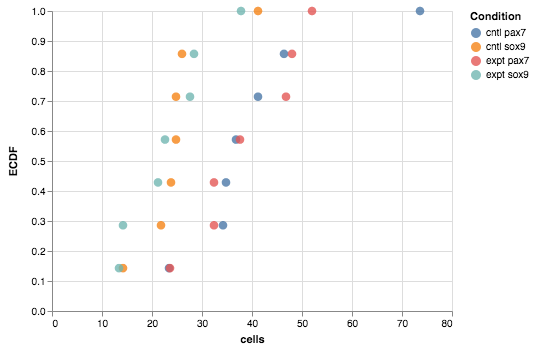

In [108]:
# Make the plot
alt.Chart(melted2
    ).mark_point(
        size=75,
        filled=True,
        opacity=0.8
    ).encode(
        x=alt.X('cells:Q'),
        y='ECDF:Q',
        color=alt.Color('stain:N',
                       title='Condition')
    )

In [105]:
alt.Color?

Init signature: alt.Color(shorthand=Undefined, aggregate=Undefined, bin=Undefined, condition=Undefined, field=Undefined, legend=Undefined, scale=Undefined, sort=Undefined, timeUnit=Undefined, title=Undefined, type=Undefined, **kwds)
Docstring:     
Color schema wrapper

Mapping(required=[shorthand])
A FieldDef with Condition :raw-html:`<ValueDef>`
{
   condition: {value: ...},
   field: ...,
   ...
}

Attributes
----------
shorthand : string
    shorthand for field, aggregate, and type
aggregate : Aggregate
    Aggregation function for the field (e.g., ``mean``, ``sum``, ``median``, ``min``,
    ``max``, ``count`` ).  **Default value:** ``undefined`` (None)
bin : anyOf(boolean, BinParams)
    A flag for binning a ``quantitative`` field, or `an object defining binning
    parameters <https://vega.github.io/vega-lite/docs/bin.html#params>`_. If ``true``,
    default `binning parameters <https://vega.github.io/vega-lite/docs/bin.html>`_ will
    be applied.  **Default value:** ``false``
c